LSTM Model for Time Series Prediction:
In this project, we have developed an LSTM model to predict the time series data, with a focus on filling missing values and hyperparameter tuning using RandomSearch. Below is a structured explanation of each phase:

Data Preprocessing:
We begin by preprocessing the dataset, including handling missing values, applying stationarity tests, and scaling the data for better performance in the LSTM model.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
# Load dataset
data = pd.read_csv(r'C:/Users/jyo14/Downloads/NIFTY50_all.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.drop(columns='Series', inplace=True)

# Handle missing values with backfill
data['Deliverable Volume'] = data.groupby('Symbol')['Deliverable Volume'].fillna(method='bfill')
data['%Deliverble'] = data.groupby('Symbol')['%Deliverble'].fillna(method='bfill')

# Drop rows with missing values in selected columns
x = data.loc[:, ["Prev Close", "Open", "High", "Low", "Last", "Close", "VWAP", "Volume", "Turnover", "Deliverable Volume", "%Deliverble"]].dropna()
y = data["Trades"].notnull()

# Fill missing 'Trades' using a linear regression model
x_test = data[data["Trades"].isnull()].loc[:, ["Prev Close", "Open", "High", "Low", "Last", "Close", "VWAP", "Volume", "Turnover", "Deliverable Volume", "%Deliverble"]]
model = LinearRegression()
model.fit(x, y)
data.loc[data["Trades"].isnull(), "Trades"] = model.predict(x_test)


In [2]:
data['Symbol'].replace({"BHARTI":"BHARTIARTL" ,"HDFC":"HDFCBANK","HEROHONDA":"HEROMOTOCO","HINDALC0":"HINDALCO","HINDLEVER":"HINDUNILVR",
"INFOSYSTCH":"INFY","JSWSTL":"JSWSTEEL","KOTAKMAH":"KOTAKBANK" ,"ZEEL":"ZEETELE","TISCO":"TATASTEEL","BAJAJFINSV":"BAJFINANCE","BAJAJ-AUTO":"BAJAUTOFIN","UNIPHOS":"UPL"},inplace = True)

In [3]:
data.to_csv('nifty')

In [4]:
data.columns

Index(['Date', 'Symbol', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close',
       'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                235192 non-null  datetime64[ns]
 1   Symbol              235192 non-null  object        
 2   Prev Close          235192 non-null  float64       
 3   Open                235192 non-null  float64       
 4   High                235192 non-null  float64       
 5   Low                 235192 non-null  float64       
 6   Last                235192 non-null  float64       
 7   Close               235192 non-null  float64       
 8   VWAP                235192 non-null  float64       
 9   Volume              235192 non-null  int64         
 10  Turnover            235192 non-null  float64       
 11  Trades              235192 non-null  float64       
 12  Deliverable Volume  235192 non-null  float64       
 13  %Deliverble         235192 no

In [6]:
import tensorflow as tf

In [7]:
import warnings 
warnings.filterwarnings('ignore')

Stationarity Test:
We perform the Augmented Dickey-Fuller (ADF) test to assess whether the time series is stationary, a critical assumption for time series forecasting models like LSTM.

<Figure size 1500x800 with 0 Axes>

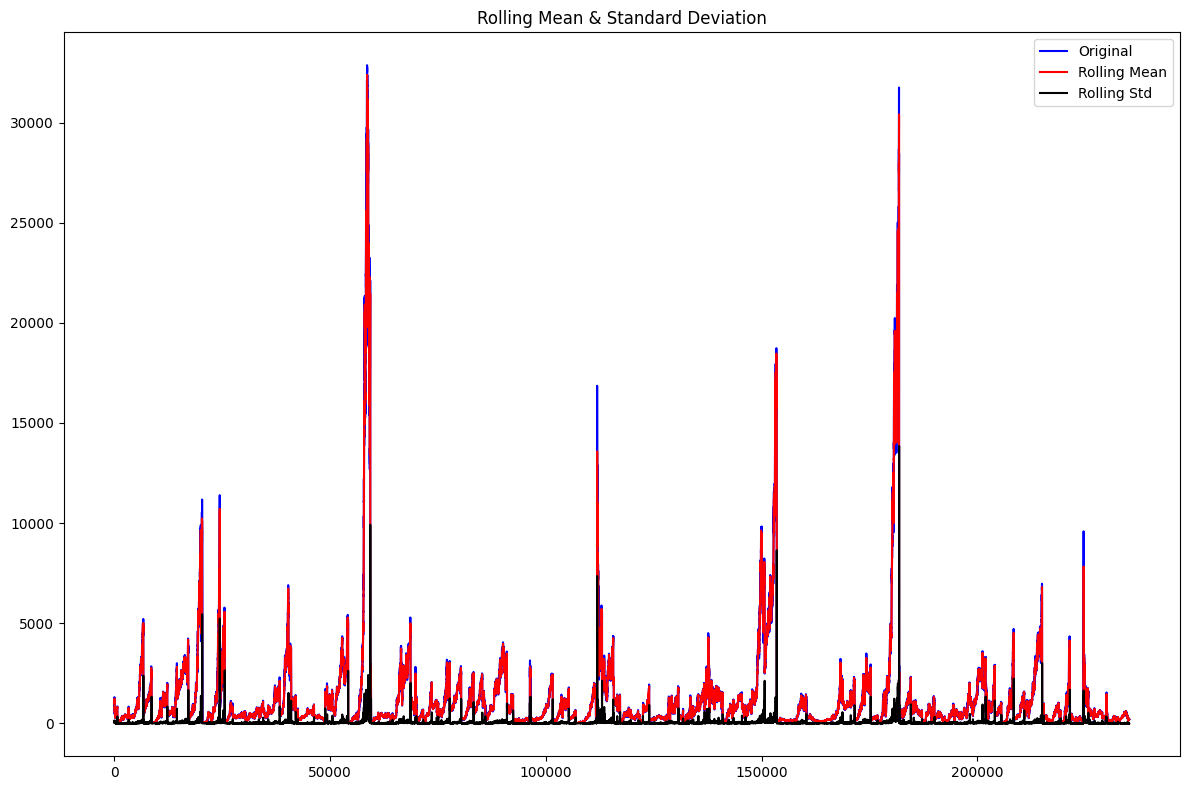

Results of Dickey-Fuller Test for Close:
Test Statistic                -9.109005e+00
p-value                        3.440000e-15
#Lags Used                     8.200000e+01
Number of Observations Used    2.351090e+05
Critical Value (1%)           -3.430378e+00
Critical Value (5%)           -2.861552e+00
Critical Value (10%)          -2.566777e+00
dtype: float64


<Figure size 1500x800 with 0 Axes>

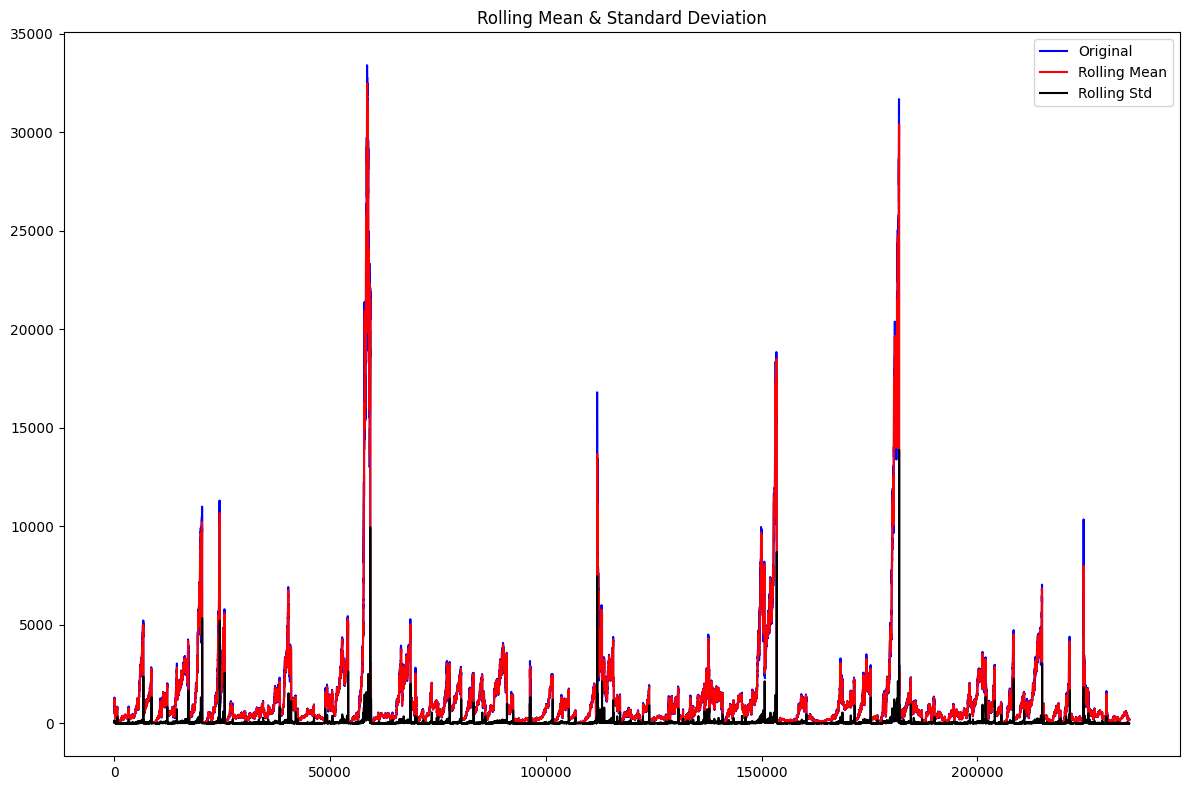

Results of Dickey-Fuller Test for Open:
Test Statistic                -9.139147e+00
p-value                        2.880848e-15
#Lags Used                     8.300000e+01
Number of Observations Used    2.351080e+05
Critical Value (1%)           -3.430378e+00
Critical Value (5%)           -2.861552e+00
Critical Value (10%)          -2.566777e+00
dtype: float64


<Figure size 1500x800 with 0 Axes>

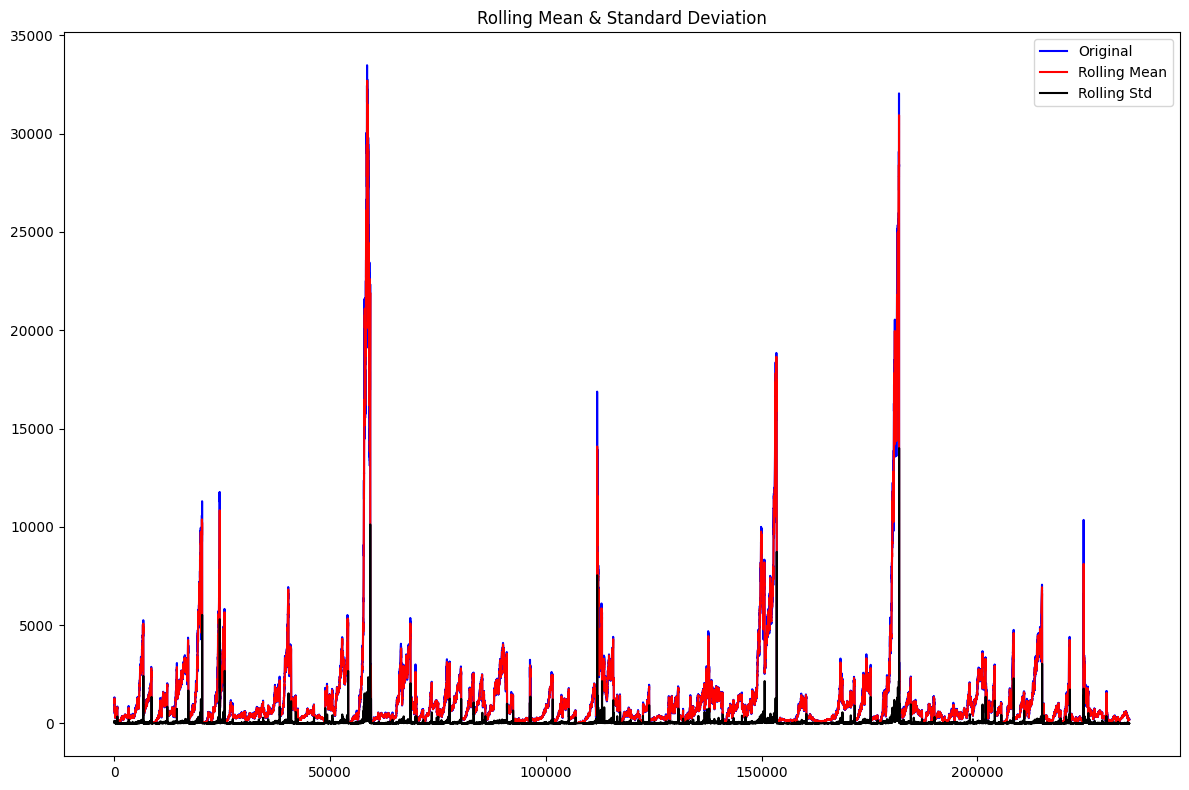

Results of Dickey-Fuller Test for High:
Test Statistic                -9.163329e+00
p-value                        2.498797e-15
#Lags Used                     8.300000e+01
Number of Observations Used    2.351080e+05
Critical Value (1%)           -3.430378e+00
Critical Value (5%)           -2.861552e+00
Critical Value (10%)          -2.566777e+00
dtype: float64


<Figure size 1500x800 with 0 Axes>

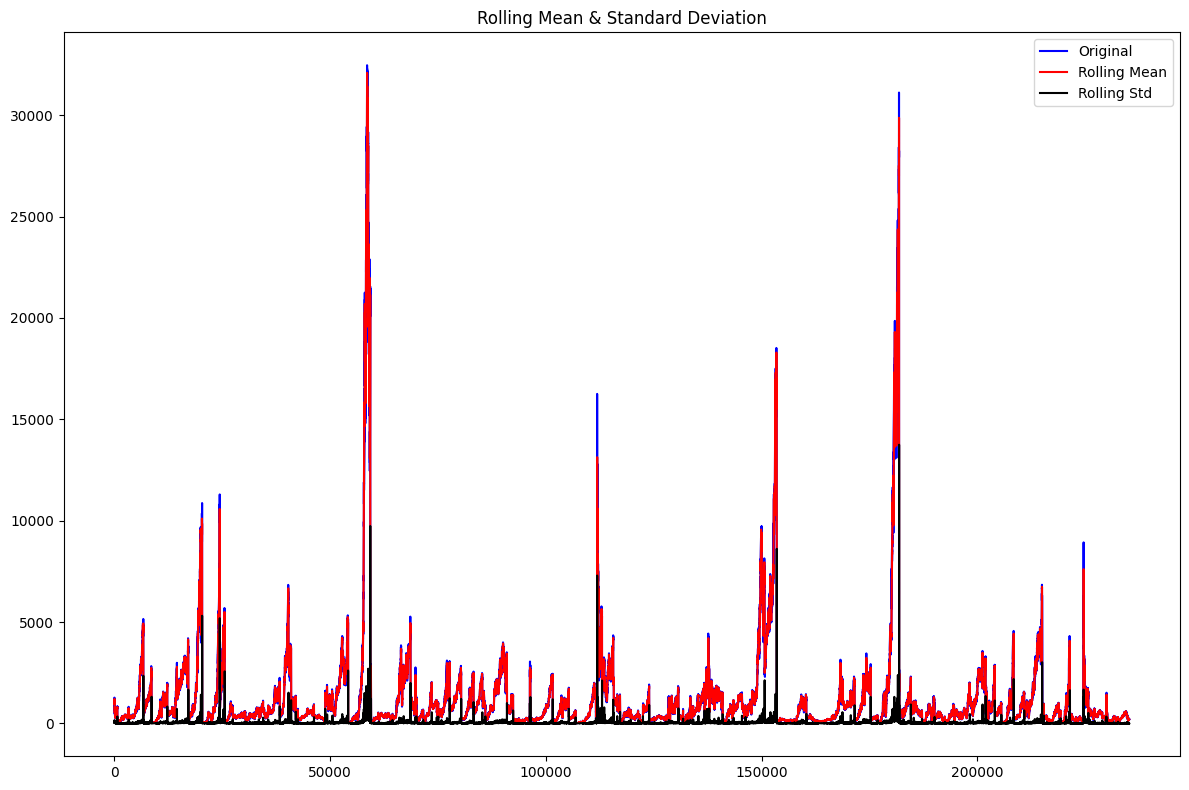

Results of Dickey-Fuller Test for Low:
Test Statistic                -9.069397e+00
p-value                        4.343368e-15
#Lags Used                     8.400000e+01
Number of Observations Used    2.351070e+05
Critical Value (1%)           -3.430378e+00
Critical Value (5%)           -2.861552e+00
Critical Value (10%)          -2.566777e+00
dtype: float64


<Figure size 1500x800 with 0 Axes>

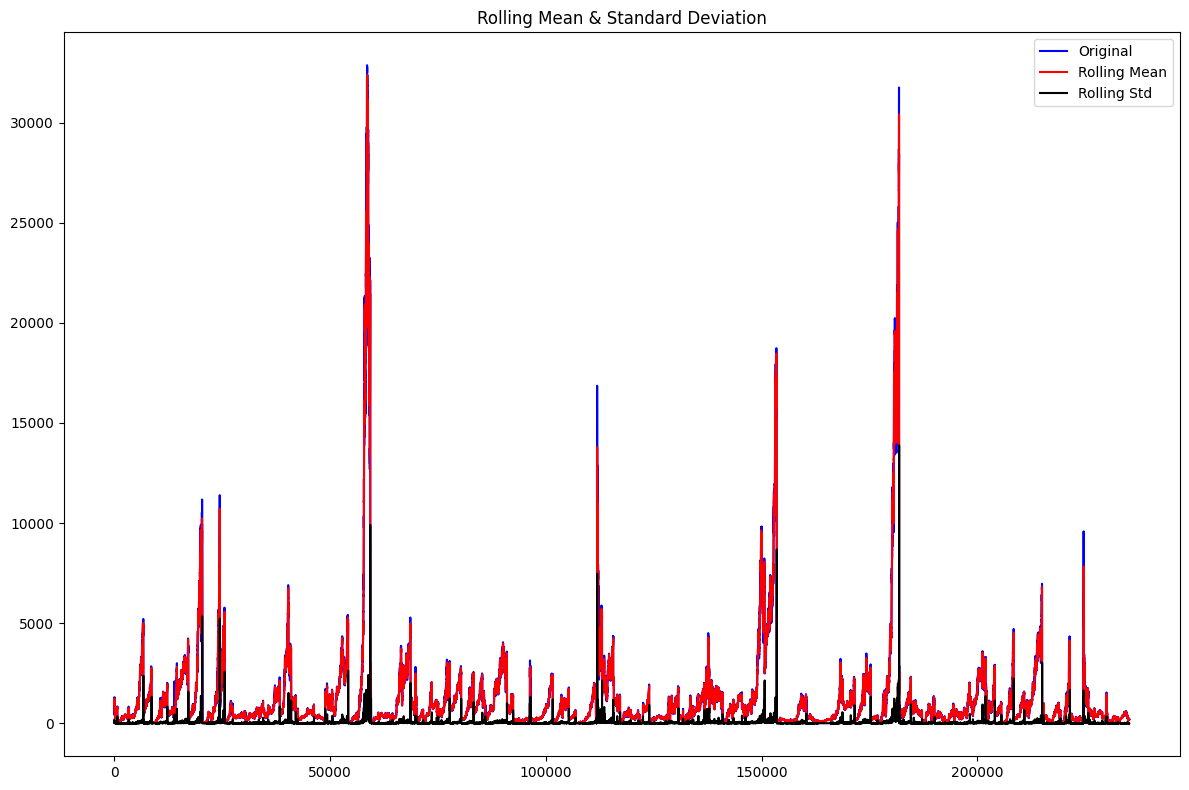

Results of Dickey-Fuller Test for Prev Close:
Test Statistic                -9.165432e+00
p-value                        2.468074e-15
#Lags Used                     8.400000e+01
Number of Observations Used    2.351070e+05
Critical Value (1%)           -3.430378e+00
Critical Value (5%)           -2.861552e+00
Critical Value (10%)          -2.566777e+00
dtype: float64


<Figure size 1500x800 with 0 Axes>

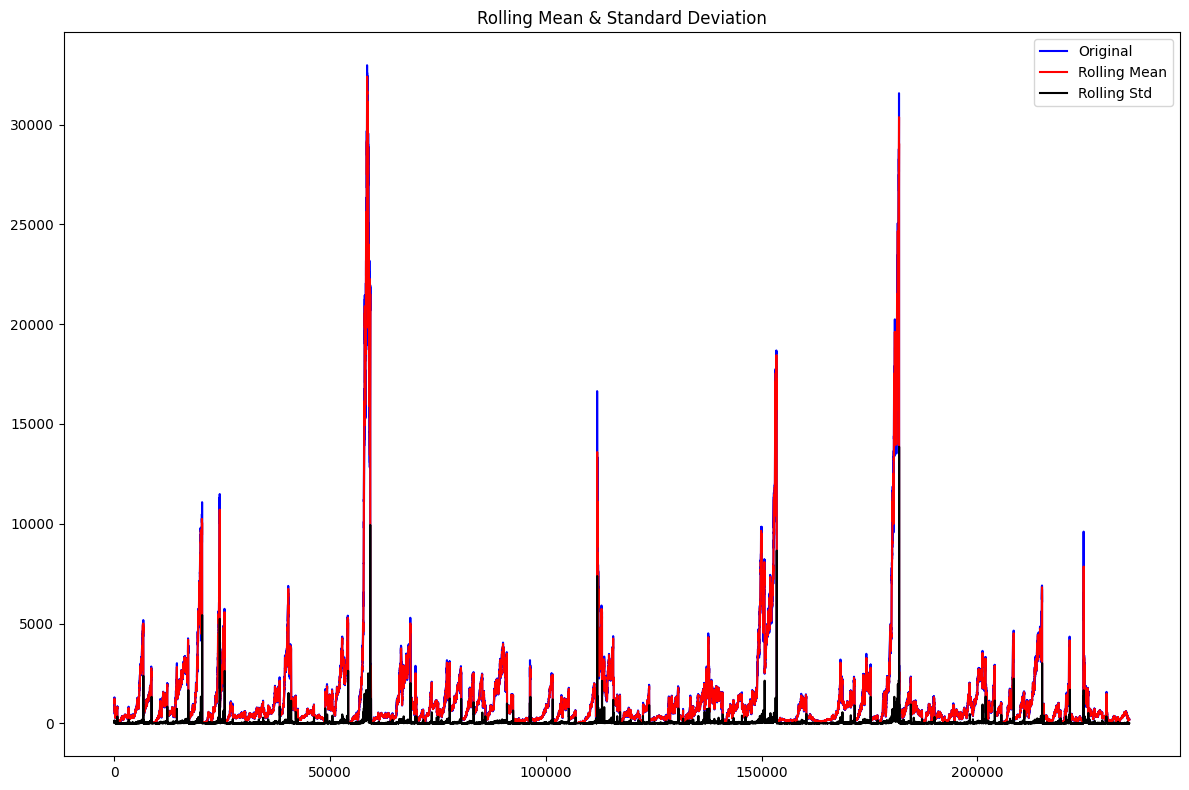

Results of Dickey-Fuller Test for VWAP:
Test Statistic                -9.173349e+00
p-value                        2.355782e-15
#Lags Used                     8.000000e+01
Number of Observations Used    2.351110e+05
Critical Value (1%)           -3.430378e+00
Critical Value (5%)           -2.861552e+00
Critical Value (10%)          -2.566777e+00
dtype: float64


<Figure size 1500x800 with 0 Axes>

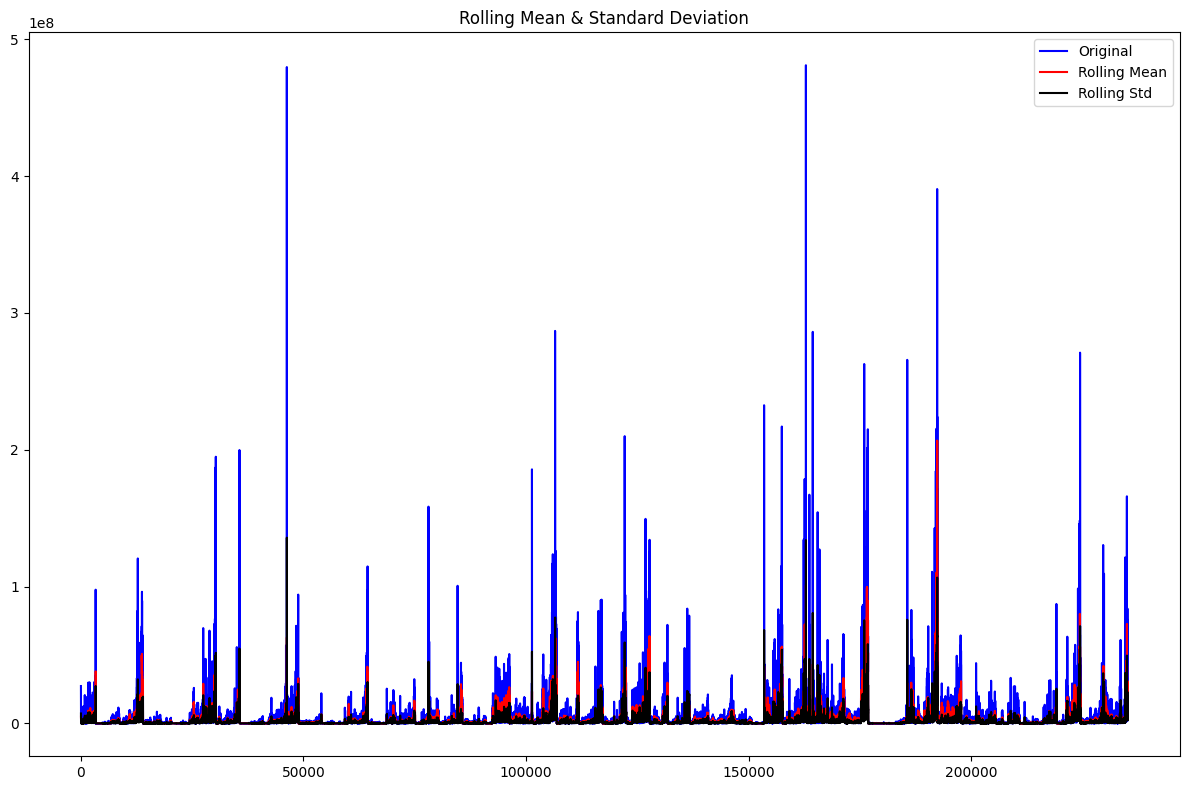

Results of Dickey-Fuller Test for Volume:
Test Statistic                -1.742237e+01
p-value                        4.817813e-30
#Lags Used                     8.400000e+01
Number of Observations Used    2.351070e+05
Critical Value (1%)           -3.430378e+00
Critical Value (5%)           -2.861552e+00
Critical Value (10%)          -2.566777e+00
dtype: float64


<Figure size 1500x800 with 0 Axes>

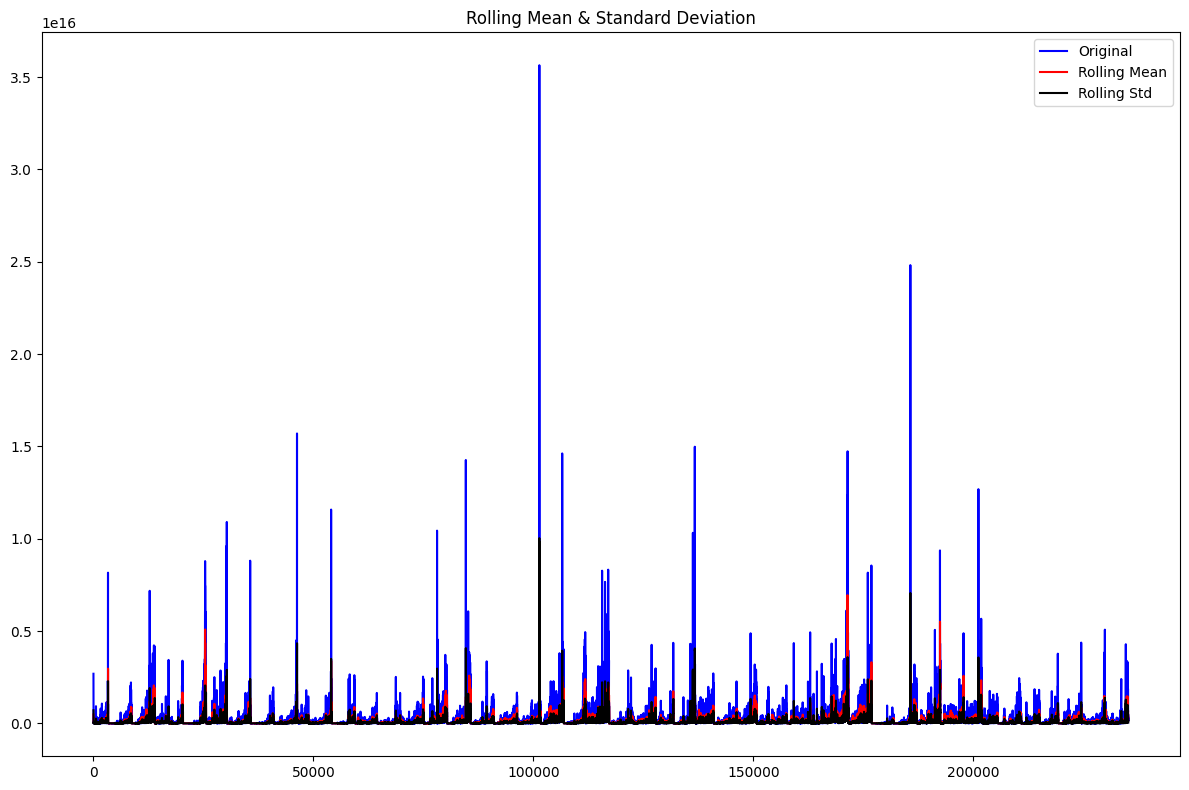

Results of Dickey-Fuller Test for Turnover:
Test Statistic                -1.839982e+01
p-value                        2.193369e-30
#Lags Used                     8.300000e+01
Number of Observations Used    2.351080e+05
Critical Value (1%)           -3.430378e+00
Critical Value (5%)           -2.861552e+00
Critical Value (10%)          -2.566777e+00
dtype: float64


<Figure size 1500x800 with 0 Axes>

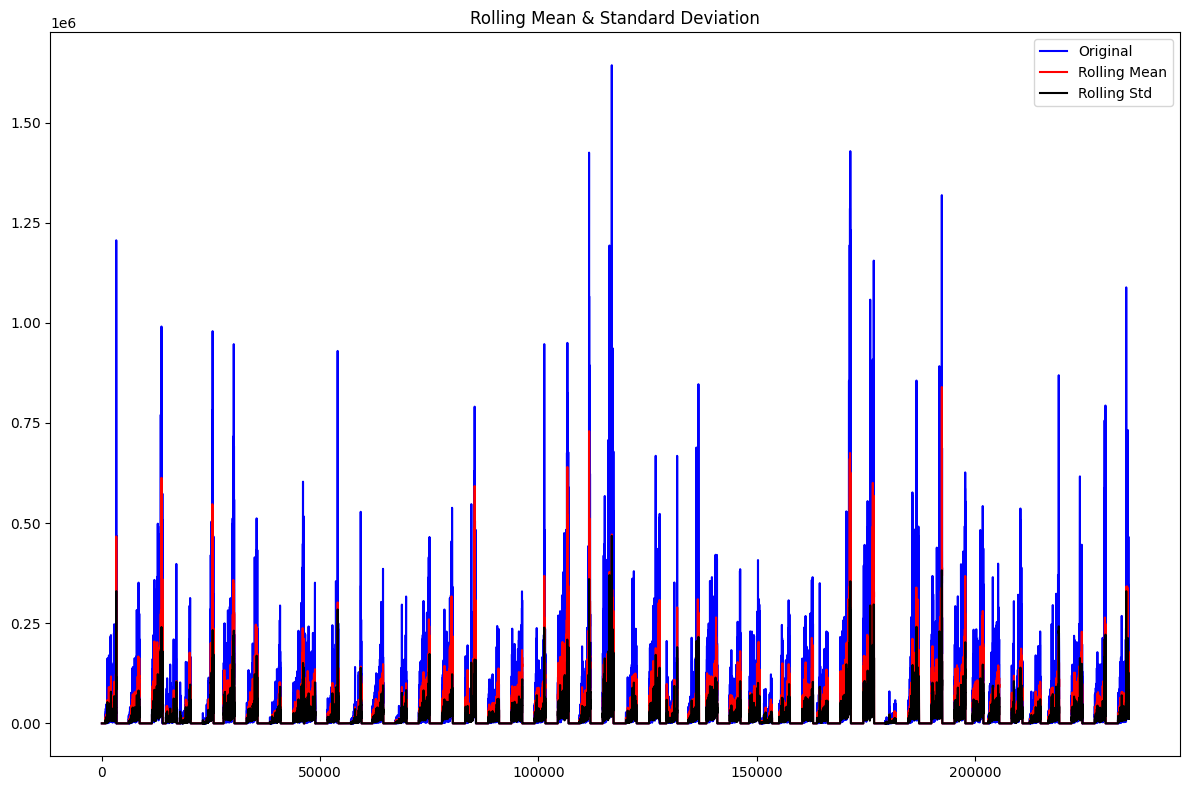

Results of Dickey-Fuller Test for Trades:
Test Statistic                -1.659481e+01
p-value                        1.785774e-29
#Lags Used                     8.300000e+01
Number of Observations Used    2.351080e+05
Critical Value (1%)           -3.430378e+00
Critical Value (5%)           -2.861552e+00
Critical Value (10%)          -2.566777e+00
dtype: float64


<Figure size 1500x800 with 0 Axes>

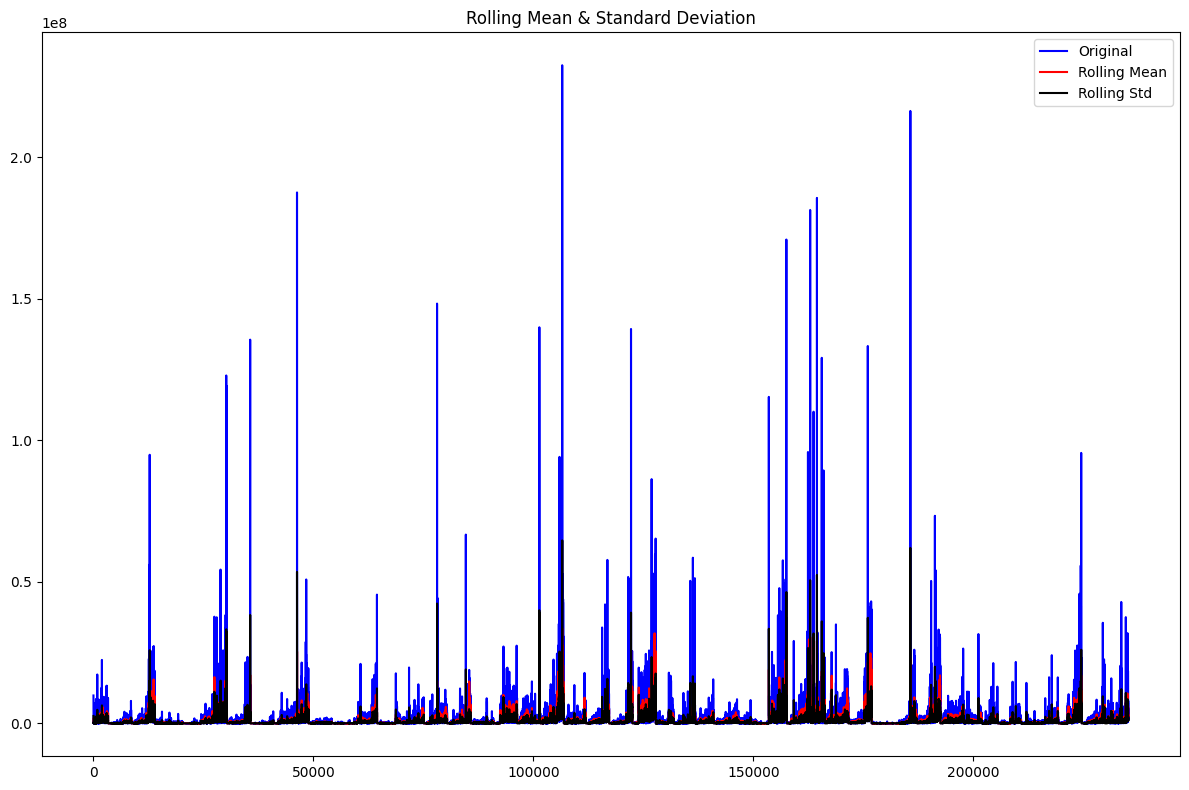

Results of Dickey-Fuller Test for Deliverable Volume:
Test Statistic                -1.559692e+01
p-value                        1.849868e-28
#Lags Used                     8.400000e+01
Number of Observations Used    2.351070e+05
Critical Value (1%)           -3.430378e+00
Critical Value (5%)           -2.861552e+00
Critical Value (10%)          -2.566777e+00
dtype: float64


<Figure size 1500x800 with 0 Axes>

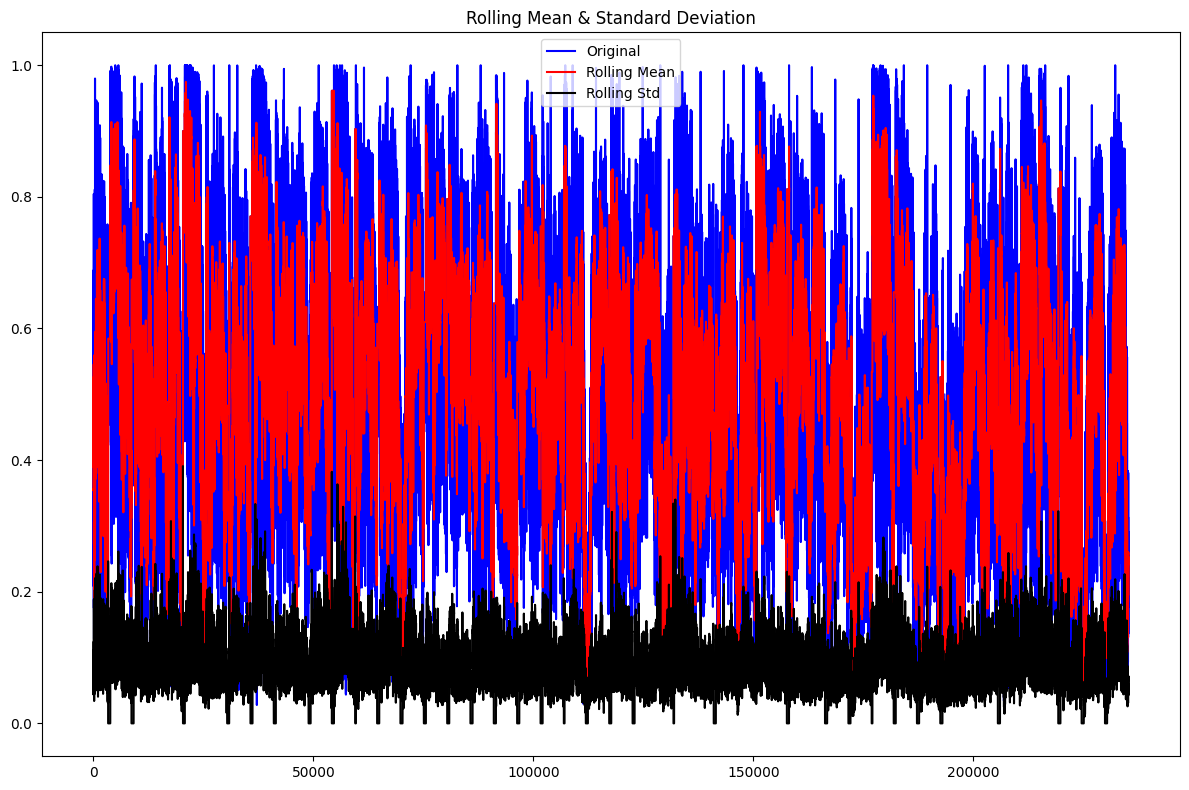

Results of Dickey-Fuller Test for %Deliverble:
Test Statistic                -1.399102e+01
p-value                        4.016442e-26
#Lags Used                     8.400000e+01
Number of Observations Used    2.351070e+05
Critical Value (1%)           -3.430378e+00
Critical Value (5%)           -2.861552e+00
Critical Value (10%)          -2.566777e+00
dtype: float64


In [8]:
# Stationarity test function
def test_stationarity(timeseries, column):
    plt.figure(figsize=(12, 8))
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.tight_layout()
    plt.show()

    print(f'Results of Dickey-Fuller Test for {column}:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)

# Apply the stationarity test to key columns
columns_to_test = ['Close', 'Open', 'High', 'Low', 'Prev Close','VWAP', 'Volume','Turnover','Trades','Deliverable Volume','%Deliverble']
for column in columns_to_test:
    plt.figure(figsize=(15,8))
    test_stationarity(data[column], column)


Data Scaling:
We scale the data using the MinMaxScaler to normalize the features, ensuring better performance during LSTM training.

In [9]:
# Data Scaling
scaler = MinMaxScaler()
data_sc = scaler.fit_transform(data[["Close", "Open", "High", "Low",'Prev Close', "VWAP", "Volume","Turnover","Trades","Deliverable Volume","%Deliverble"]])

In [10]:
# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i, 0])  # Assuming 'Close' is the target column
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(data_sc, seq_length)

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [14]:
# Build LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer


In [15]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [16]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 111s 30ms/step - loss: 3.5703e-04 - val_loss: 3.6319e-05
Epoch 2/10
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 95s 26ms/step - loss: 1.2862e-04 - val_loss: 3.2674e-05
Epoch 3/10
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 97s 26ms/step - loss: 1.0105e-04 - val_loss: 1.6089e-05
Epoch 4/10
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 101s 27ms/step - loss: 8.5503e-05 - val_loss: 2.0322e-05
Epoch 5/10
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 99s 27ms/step - loss: 8.8985e-05 - val_loss: 1.9417e-05
Epoch 6/10
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 98s 27ms/step - loss: 9.5148e-05 - val_loss: 1.2143e-05
Epoch 7/10
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 103s 28ms/step - loss: 8.0492e-05 - val_loss: 1.7805e-05
Epoch 8/10
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 107s 29ms/step - loss: 8.2665e-05 - val_loss: 7.2916e-05
Epoch 9/10
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 106s 29ms/step - loss: 7.9682e-05 - val_loss: 1.6932e-05
Epoch 10/10
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 107s 29ms/step - loss: 7.5527e-05 - val_loss: 2.1805e-05


In [17]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

3674/3674 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 2.0203e-05
Test Loss: 2.1805361029691994e-05


In [20]:
# Hyperparameter Tuning Using RandomSearch
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=32), return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=32), return_sequences=False))
    model.add(Dense(1))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='mean_squared_error')
    return model

In [22]:
from keras_tuner import RandomSearch
# RandomSearch tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    directory='random_search',
    project_name='LSTM_tuning4'
)

# Run hyperparameter search
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=32)

Trial 5 Complete [00h 06m 33s]
val_loss: 1.6042917195591144e-05

Best val_loss So Far: 1.2724454791168682e-05
Total elapsed time: 00h 58m 18s


In [23]:
# Retrieve the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 162s 44ms/step - loss: 2.9984e-04 - val_loss: 6.2609e-05
Epoch 2/5
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 161s 44ms/step - loss: 5.8971e-05 - val_loss: 3.8767e-05
Epoch 3/5
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 159s 43ms/step - loss: 4.3863e-05 - val_loss: 4.8912e-05
Epoch 4/5
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 159s 43ms/step - loss: 6.2406e-05 - val_loss: 1.8324e-05
Epoch 5/5
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 160s 43ms/step - loss: 8.0089e-05 - val_loss: 1.3314e-05


In [34]:
best_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 128)        │        71,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 610,181 (2.33 MB)

 Trainable params: 203,393 (794.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 406,788 (1.55 MB)

In [48]:
# Assuming you have already run the tuner.search() method as in previous code
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Display the best hyperparameters
print(f"Best units: {best_hps.get('units')}")
print(f"Best dropout: {best_hps.get('dropout')}")
print(f"Best learning rate: {best_hps.get('learning_rate')}")


Best units: 128
Best dropout: 0.4
Best learning rate: 0.001


In [25]:
from sklearn.metrics import *
# Evaluate on the test set
test_predictions = best_model.predict(X_test)

# Calculate RMSE and MAE
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
test_mae = mean_absolute_error(y_test, test_predictions)

print(f'Test RMSE: {test_rmse}')
print(f'Test MAE: {test_mae}')

3674/3674 ━━━━━━━━━━━━━━━━━━━━ 45s 12ms/step
Test RMSE: 0.0036488987500631555
Test MAE: 0.0016687912060451486


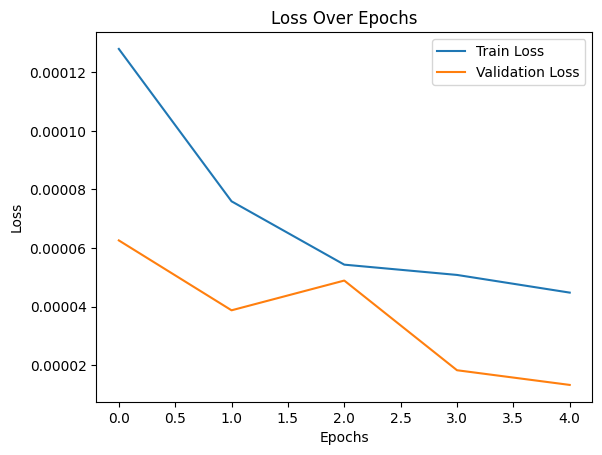

In [26]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import r2_score

train_r2 = r2_score(y_train, model.predict(X_train))
test_r2 = r2_score(y_test, model.predict(X_test))

print(f"Train R² Score: {train_r2}")
print(f"Test R² Score: {test_r2}")

3674/3674 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step
Train R² Score: 0.9956525799508419
Test R² Score: 0.9965394827945532


In [ ]:
loss_difference = final_train_loss - final_val_loss
loss_ratio = final_train_loss / final_val_loss

print(f"Loss Difference (Train - Val): {loss_difference}")
print(f"Loss Ratio (Train / Val): {loss_ratio}")

In [45]:
from sklearn.metrics import mean_squared_error
import numpy as np

train_mse = mean_squared_error(y_train, model.predict(X_train))
val_mse = mean_squared_error(y_test, model.predict(X_test))

train_rmse = np.sqrt(train_mse)
val_rmse = np.sqrt(val_mse)

print(f"Train RMSE: {train_rmse}")
print(f"Validation RMSE: {val_rmse}")

3674/3674 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step
Train RMSE: 0.005131433845989364
Validation RMSE: 0.004669622603225321


In [46]:
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(y_train, model.predict(X_train))
val_mae = mean_absolute_error(y_test, model.predict(X_test))

print(f"Train MAE: {train_mae}")
print(f"Validation MAE: {val_mae}")

3674/3674 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step
Train MAE: 0.002404757421233582
Validation MAE: 0.002405024407647904


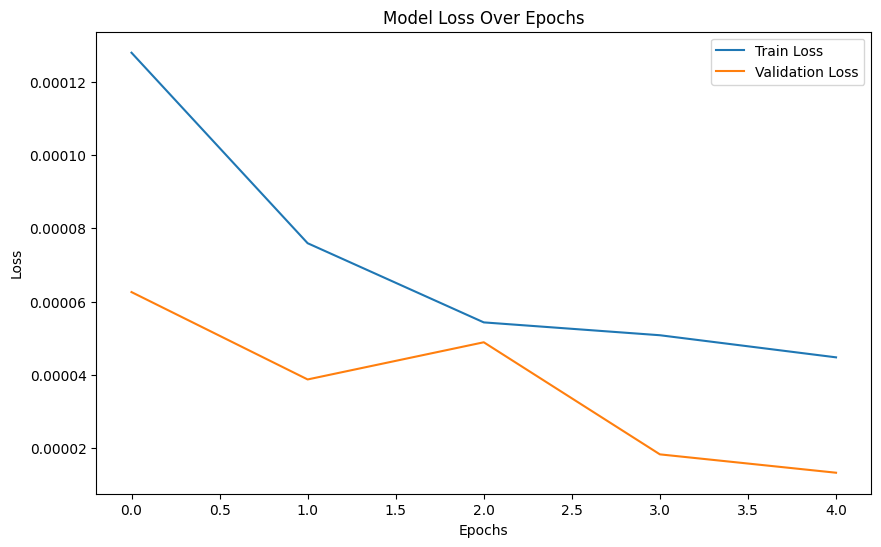

In [27]:
 # Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
def pred(single_stock_symbol):
    filtered_data = data[data['Symbol'] == single_stock_symbol]
    # Prepare the data
    X = filtered_data[['Open', 'High', 'Low','Prev Close','VWAP', 'Close','Volume','Deliverable Volume','%Deliverble','Trades','Turnover']]
    y = filtered_data['Close']

    # Scale the entire dataset
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # Create sequences
    seq_length = 60  # This should match the sequence length used during training
    X_seq, y_seq = [], []
    for i in range(len(X_scaled) - seq_length):
        X_seq.append(X_scaled[i:(i + seq_length)])
        y_seq.append(X_scaled[i + seq_length, 3])  # 3 is the index of 'Close' in X

    X_seq, y_seq = np.array(X_seq), np.array(y_seq)

    # Split the data
    split = int(0.8 * len(X_seq))
    X_train, X_test = X_seq[:split], X_seq[split:]
    y_train, y_test = y_seq[:split], y_seq[split:]

    # Forecast future values
    def forecast_future_values(model, last_sequence, scaler, num_steps=60):
        future_predictions = []
        current_sequence = last_sequence.reshape((1, last_sequence.shape[0], last_sequence.shape[1]))

        for _ in range(num_steps):
            # Predict the next step
            next_pred = model.predict(current_sequence)[0]

            # Append the prediction
            future_predictions.append(next_pred)

            # Update the sequence
            current_sequence = np.roll(current_sequence, -1, axis=1)
            current_sequence[0, -1, :] = next_pred

        # Inverse transform
        future_predictions = np.array(future_predictions)
        future_predictions_2d = np.column_stack([future_predictions] * X.shape[1])
        global future_predictions_inv
        future_predictions_inv = scaler.inverse_transform(future_predictions_2d)[:, 3]  # 3 is the index of 'Close'

        return future_predictions_inv

    # Make predictions
    future_predictions = forecast_future_values(best_model, X_test[-1], scaler, num_steps=60)

    # Prepare actual values for plotting
    y_actual = scaler.inverse_transform(X_scaled)[:, 3]  # 3 is the index of 'Close'

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(y_actual)), y_actual, color='blue', label=f'Actual Close Price of {single_stock_symbol}')
    plt.plot(range(len(y_actual), len(y_actual) + 60), future_predictions, color='red', label=f'Forecasted Close Price of {single_stock_symbol}')
    plt.title(f'Actual Close Price and 60-Step Forecast for {single_stock_symbol}')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()
    #pd.date_range(start='2020-01-01', periods=60, freq='M')
    return pd.DataFrame( pd.date_range(start='2020-01-01', periods=60, freq='D'),future_predictions_inv) 


In [35]:
print(X_test[-1].shape)  # Should be (60, 10)

(60, 11)


In [36]:
print(X.shape)

(235132, 60, 11)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━

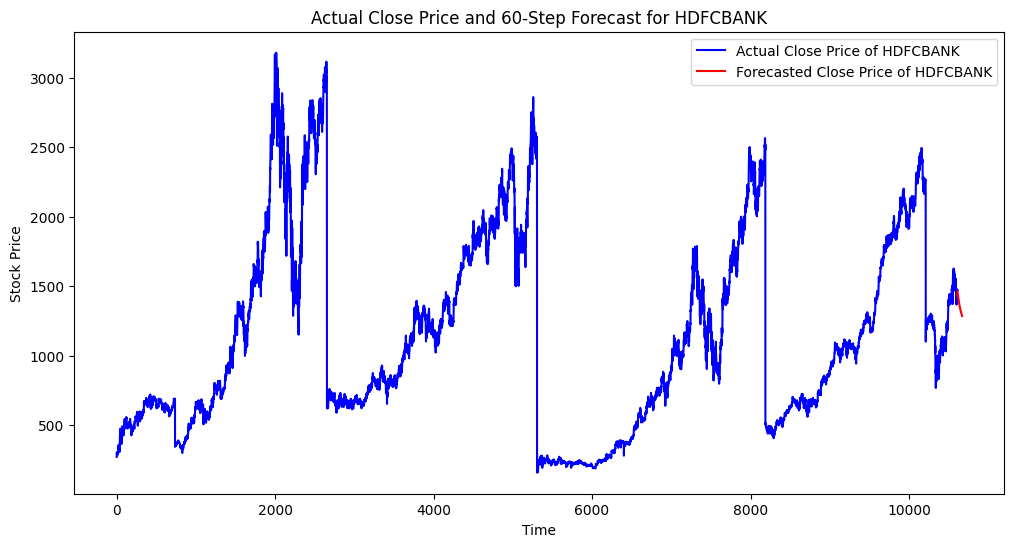

,0
1463.920532,2020-01-01
1434.411377,2020-01-02
1438.734863,2020-01-03
1438.859985,2020-01-04
1439.042236,2020-01-05
1437.888794,2020-01-06
1435.594849,2020-01-07
1432.438477,2020-01-08
1428.744507,2020-01-09
1424.770874,2020-01-10


In [38]:
pred('HDFCBANK')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

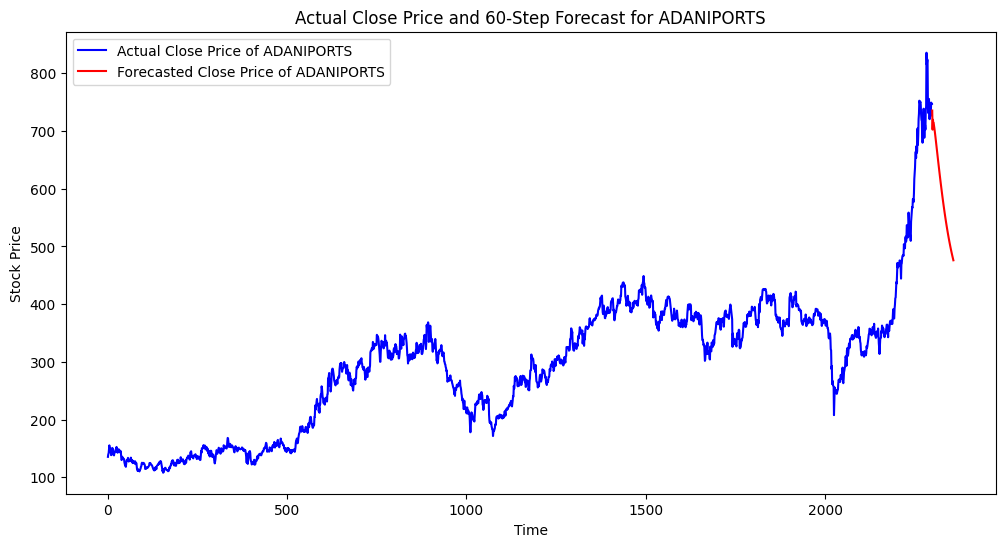

,0
735.383179,2020-01-01
702.315308,2020-01-02
719.412964,2020-01-03
713.777344,2020-01-04
713.752075,2020-01-05
709.162292,2020-01-06
704.945312,2020-01-07
699.916016,2020-01-08
694.801270,2020-01-09
689.476196,2020-01-10


In [39]:
pred('ADANIPORTS')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

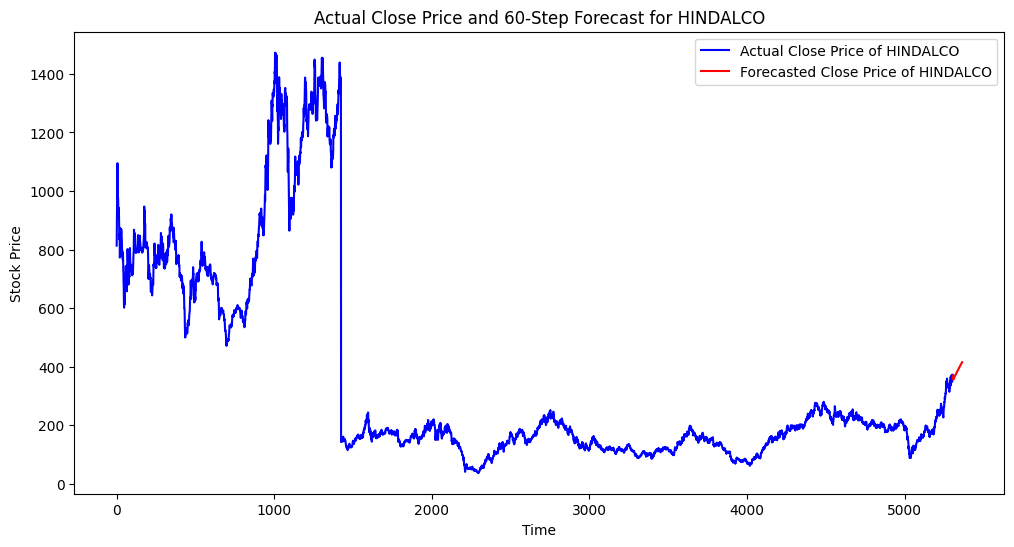

,0
356.883789,2020-01-01
369.177673,2020-01-02
366.554108,2020-01-03
361.633911,2020-01-04
357.848694,2020-01-05
356.502350,2020-01-06
357.252533,2020-01-07
359.156281,2020-01-08
361.333740,2020-01-09
363.258636,2020-01-10


In [40]:
pred('HINDALCO')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

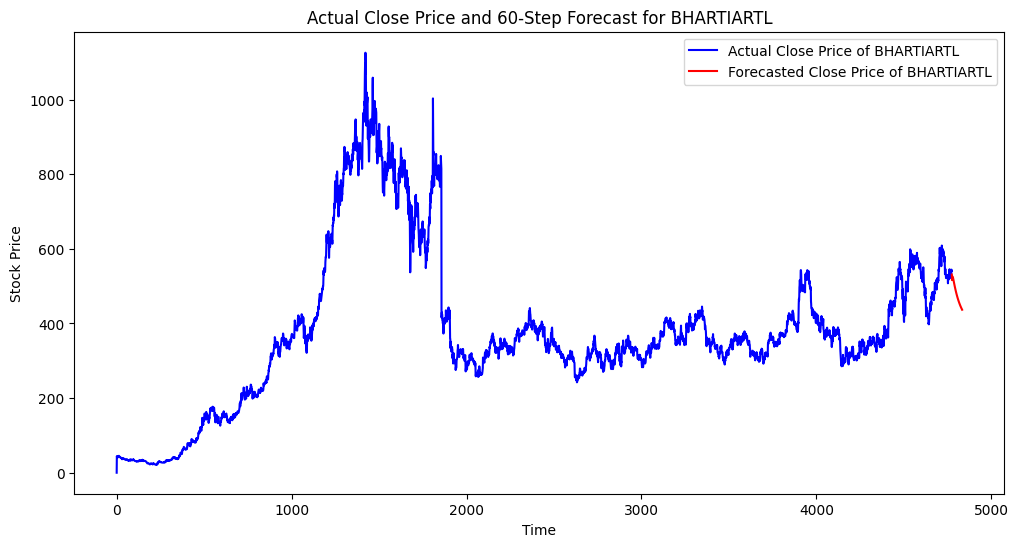

,0
531.182251,2020-01-01
516.270325,2020-01-02
522.334595,2020-01-03
524.562439,2020-01-04
525.724060,2020-01-05
525.342468,2020-01-06
524.005310,2020-01-07
522.121765,2020-01-08
519.970520,2020-01-09
517.700500,2020-01-10


In [41]:
pred('BHARTIARTL')